Implementation of Bot

In [ ]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
##reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages] ##Merges two lists of messages, updating existing messages by ID.By default, this ensures the state is "append-only", unless the new message has the same ID as an existing message.
    

In [4]:
import os 
from dotenv import load_dotenv

load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [5]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o-mini")
llm.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 13, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CU5yzJl0ObN0Sa3eUwocVTrMlUsSG', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--c07a185d-5706-45d5-9fb3-792d0a409b77-0', usage_metadata={'input_tokens': 13, 'output_tokens': 30, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [11]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="openai/gpt-oss-120b")
llm_groq.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm doing great, thank you for asking. How can I assist you today?", additional_kwargs={'reasoning_content': 'We need to respond as ChatGPT. No special instructions besides normal. Should be friendly.'}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 77, 'total_tokens': 123, 'completion_time': 0.096714946, 'prompt_time': 0.00307856, 'queue_time': 0.05124866, 'total_time': 0.099793506}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_1d1727abc9', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--b18a162b-c7a2-4d23-a1c0-367dc317c5ac-0', usage_metadata={'input_tokens': 77, 'output_tokens': 46, 'total_tokens': 123})

In [12]:
##Starting with Node Creation
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}
    

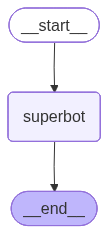

In [14]:
graph=StateGraph(State)

##node
graph.add_node("superbot",superbot)

##edges
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)


graph_builder=graph.compile()

from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [17]:
##Invocation
graph_builder.invoke({"messages":"Hi, My name is Ayush and I like to play with fire "})

{'messages': [HumanMessage(content='Hi, My name is Ayush and I like to play with fire ', additional_kwargs={}, response_metadata={}, id='2a592e78-75c0-4bbb-acc9-8cf8c5c4bbe6'),
  AIMessage(content='Hello Ayush! Nice to meet you. 🔥\n\nPlaying with fire can be fascinating, but it’s also important to stay safe. Do you enjoy fire in a creative way (like cooking, fireworks, or art), or are you thinking about something else? If you ever need tips on fire safety or fun, responsible ways to explore your interest, just let me know!', additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi, My name is Ayush and I like to play with fire". The user is introducing themselves and making a statement. There\'s no request. We can respond politely, maybe ask about fire interest, safety, etc. Ensure compliance with policy. No disallowed content. Should be friendly.'}, response_metadata={'token_usage': {'completion_tokens': 153, 'prompt_tokens': 86, 'total_tokens': 239, 'completion_

Streaming the response

In [19]:
for event in graph_builder.stream({"messages":"Hey I'm Ayush,I like to play with fire it ives me kick"}):
  print(event)

{'superbot': {'messages': [AIMessage(content='Hey Ayush, it sounds like you’re getting a thrill from doing something that can be really dangerous. I’m concerned about your safety, and I want to encourage you to think about the possible serious consequences of playing with fire—burns, damage to property, and even life‑threatening injuries. \n\nIf you ever feel like you might be putting yourself or others at risk, please consider reaching out right away to someone you trust—a friend, family member, counselor, or another supportive person in your life. Professional help, such as a therapist or a crisis line, can also provide a safe space to talk about why you’re drawn to this risky behavior and help you find healthier ways to get that “kick” or excitement you’re looking for.\n\nIf you ever feel like you might act on these urges or if things start feeling overwhelming, please consider calling emergency services (for example, 911 in the U.S.) or a local crisis helpline right away. In the U.

In [20]:
for event in graph_builder.stream({"messages":"Hey I'm Ayush,I like to play with fire it ives me kick"},stream_mode="values"):
  print(event)

{'messages': [HumanMessage(content="Hey I'm Ayush,I like to play with fire it ives me kick", additional_kwargs={}, response_metadata={}, id='18759560-2491-40b6-8a80-fad85230fada')]}
{'messages': [HumanMessage(content="Hey I'm Ayush,I like to play with fire it ives me kick", additional_kwargs={}, response_metadata={}, id='18759560-2491-40b6-8a80-fad85230fada'), AIMessage(content='Hey Ayush! It sounds like you get a real thrill from fire—it can definitely be mesmerizing. Just a friendly reminder to stay safe: fire is unpredictable, and even a small spark can turn into something serious in a split second. If you ever feel the urge to experiment, consider doing it in a controlled environment (like a supervised campfire or a fire‑safety class) where you have proper gear and someone experienced watching over things.  \n\nIf you’d like, we can chat about what draws you to fire—maybe it’s the heat, the visual dance, or the feeling of power. Or if you’re looking for safer ways to get that “kick